# Mandelbrot Set
This section computes the Mandelbrot set over the range [−2, 1] × [−1.5, 1.5] using a threshold of 50 and returns an image of the Mandelbrot fractal.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import symbols, diff
import math
from math import factorial
import pandas as pd

In [45]:
%%writefile mandelbrot.py
## Mandelbrot Set
#This section computes the Mandelbrot set over the range [−2, 1] × [−1.5, 1.5] using a threshold of 50 and returns an image of the Mandelbrot fractal.

x, y = np.mgrid[-2:1:200j, -1.5:1.5:200j]
c_grid = x + 1j * y #200x200 grid of complex numbers
z_grid = np.zeros((200, 200)) #initalize grid to store z values
N_max = 100

# Calculate the Mandelbrot Set for each point
for i in range(c_grid.shape[0]):
     for j in range(c_grid.shape[1]):
        z = 0
        iterations = 0

        while abs(z) <= 2 and iterations < N_max:
          z = z*z + c_grid[i,j]
          iterations += 1
        z_grid[i,j] = abs(z) #stores the z value in the z_grid
#the mask only keeps values that are less than 2
mask = z_grid < 2

#plot the set
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.savefig('mandelbrot.png')
plt.show()

Writing mandelbrot.py


In [46]:
#Markov Chain
%%writefile markov_chain.py

#create random 5x5 matrix
P = np.random.rand(5,5)
row_norms = P.sum(axis=1, keepdims=True)
P = P / row_norms

#create random 5x1 vector
p = np.random.rand(5,1)
p = p / p.sum()

#Apply the transition rule 50 times
p_hat = p
for i in range(50):
  p_hat = np.dot(P.transpose(), p_hat)

#get eigenvalues and eigenvectors from P^T
eigenvalues, eigenvectors = np.linalg.eig(P.transpose())

#the first eigenvector corresponds to eigenvalue 1
stat_dist = eigenvectors.transpose()[0]
stat_dist = stat_dist / stat_dist.sum()

#Compute the difference
difference = stat_dist - p_hat.transpose()
print(difference)
#We can see in the output that they match very closely


Writing markov_chain.py


In [47]:
#Taylor Approximation
#and outputs a NumPy array of points approximating f in the interval (start, end).
%%writefile taylor.py
from sympy import symbols, diff

def function_approx(func, start, end, num_points, degree, fixed_c):
  # Define x as a symbolic variable for use in the derivative
  x = symbols('x')

  inputs = np.linspace(start, end, num_points)
  outputs = np.zeros(len(inputs))

  for j in range(len(outputs)):
    for i in range(degree+1):

      outputs[j] = outputs[j] + diff(func, x, i).subs(x, fixed_c) * (inputs[j]-fixed_c)**i / factorial(i)

  return outputs

Writing taylor.py


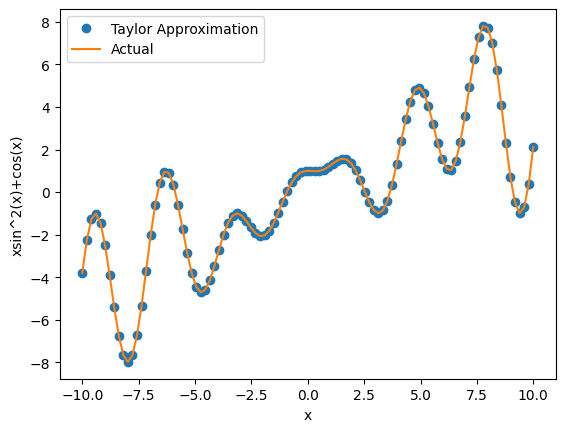

In [48]:
x = symbols('x')
test_function = x * sympy.sin(x)**2 + sympy.cos(x)

# Evaluate the test_function over a range of numerical values for plotting
x_values = np.linspace(-10, 10, 100)
actual_y_values = [test_function.subs(x, val) for val in x_values]
approx_y_values = function_approx(test_function, -10, 10, 100, 100, 0)

plt.figure()
# Plot approximation
plt.plot(x_values, approx_y_values, 'o', label='Taylor Approximation')
# Plot original function
plt.plot(x_values, actual_y_values, label='Actual')
plt.legend()
plt.xlabel('x')
plt.ylabel('xsin^2(x)+cos(x)')
plt.show()



In [49]:
import time

def time_analysis(func, start, end, num_points, fixed_c, initial_degree, final_degree, degree_step):
  """
  This function runs the approximation function a specified amount of times
  and returns a csv file that contains the sum of the differences of each point
  and the time it took for each run.
  """
  #creates the range of degrees we need to run the taylor approximation
  #function on
  num_degrees = int((final_degree - initial_degree) / degree_step) + 1
  degree_range = np.linspace(initial_degree, final_degree, num_degrees)

  #evaluates the actual function
  x_values = np.linspace(start, end, num_points)
  actual_y_values = [func.subs(x, val) for val in x_values]


  #this part iterates through the degrees we want to test and stores the
  #time it took in a vector
  elapsed_time = np.zeros(len(degree_range))
  sum_diff = np.zeros(len(degree_range))

  for i in range(len(degree_range)):
    start_time = time.perf_counter()
    approx_y_values = function_approx(func, start, end, num_points, int(degree_range[i]), fixed_c)
    end_time = time.perf_counter()
    for j in range(len(approx_y_values)):
      sum_diff[i] = sum_diff[i] + abs(actual_y_values[j] - approx_y_values[j])
    elapsed_time[i] = end_time - start_time

  #this part stores in the information in a Pandas dataframe
  taylor_values = pd.DataFrame({'Degree': degree_range, 'Time': elapsed_time, 'Sum': sum_diff})

  #this part writes the Pandas dataframe to a csv file titled taylor_values.csv
  taylor_values.to_csv('taylor_values.csv', index=False)

  return taylor_values


In [50]:
#this is the test function
x = symbols('x')
test_function = x * sympy.sin(x)**2 + sympy.cos(x)

#running the time_analysis function
x_values = np.linspace(-10, 10, 100)
taylor_values = time_analysis(test_function, -10, 10, 100, 0, 50, 100, 10)


In [51]:
print(taylor_values)

   Degree       Time           Sum
0    50.0   9.986497  4.949573e+01
1    60.0  11.879726  1.754322e-03
2    70.0  13.701017  3.199614e-07
3    80.0  15.675571  3.275207e-07
4    90.0  18.262679  3.275206e-07
5   100.0  19.610752  3.275206e-07
